In [ ]:
import sqlite3
import pandas as pd
import numpy as np
from time import time
import warnings
warnings.simplefilter("ignore")

In [ ]:
database = 'database.sqlite'
conn = sqlite3.connect(database)

In [ ]:
player_data = pd.read_sql("SELECT * FROM Player;", conn)
player_stats_data = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
team_data = pd.read_sql("SELECT * FROM Team;", conn)
match_data = pd.read_sql("SELECT * FROM Match;", conn)
league_data = pd.read_sql("SELECT * from League;",conn)
country_data = pd.read_sql("SELECT * from Country;",conn)
team_more_data = pd.read_sql("SELECT * from Team_Attributes;",conn)

In [ ]:
## Loading all functions
match_data.drop('BWA', axis=1, inplace=True)
match_data.drop('IWH', axis=1, inplace=True)
match_data.drop('IWD', axis=1, inplace=True)
match_data.drop('IWA', axis=1, inplace=True)
match_data.drop('LBH', axis=1, inplace=True)
match_data.drop('LBD', axis=1, inplace=True)
match_data.drop('LBA', axis=1, inplace=True)
match_data.drop('PSH', axis=1, inplace=True)
match_data.drop('PSD', axis=1, inplace=True)
match_data.drop('PSA', axis=1, inplace=True)
match_data.drop('WHH', axis=1, inplace=True)
match_data.drop('WHD', axis=1, inplace=True)
match_data.drop('WHA', axis=1, inplace=True)
match_data.drop('SJH', axis=1, inplace=True)
match_data.drop('VCA', axis=1, inplace=True)
match_data.drop('VCH', axis=1, inplace=True)
match_data.drop('VCD', axis=1, inplace=True)
match_data.drop('GBH', axis=1, inplace=True)
match_data.drop('GBD', axis=1, inplace=True)
match_data.drop('GBA', axis=1, inplace=True)
match_data.drop('BSH', axis=1, inplace=True)
match_data.drop('BSD', axis=1, inplace=True)
match_data.drop('BSA', axis=1, inplace=True)
match_data.drop('date', axis=1, inplace=True)
match_data.drop('B365D', axis=1, inplace=True)
match_data.drop('B365A', axis=1, inplace=True)
match_data.drop('BWD', axis=1, inplace=True)
match_data.drop('BWH', axis=1, inplace=True)
match_data.drop('possession', axis=1, inplace=True)
match_data.drop('corner', axis=1, inplace=True)
match_data.drop('goal', axis=1, inplace=True)
match_data.drop('shoton', axis=1, inplace=True)
match_data.drop('shotoff', axis=1, inplace=True)
match_data.drop('foulcommit', axis=1, inplace=True)
match_data.drop('card', axis=1, inplace=True)
match_data.drop('cross', axis=1, inplace=True)
match_data.drop('B365H', axis=1, inplace=True)
match_data.drop('season', axis=1, inplace=True)

In [ ]:
## Lebel Creation ('Result') by comparing 'home_team_goal' and 'away_team_goal', is Win (+1) if home_team_goal > away_team_goal
## Lost('-1') if away_team_goal > home_team_goal and Draw ('0') if away_team_goal = home_team_goal
def get_result_home_advantage(match_data):
    results = []
    for match in range(len(match_data.index)):
        home_goals = match_data['home_team_goal'].iloc[match]
        away_goals = match_data['away_team_goal'].iloc[match] 
        
        if home_goals > away_goals:
            results.append('+1')
        elif away_goals > home_goals:
            results.append('-1')
        else:
            results.append('0')
    match_data['result'] = results 
    return match_data        

In [ ]:
start = time()
match_rev = get_result_home_advantage(match_data) 
end = time()
print("Result column added in {:.1f} seconds".format((end - start)))

In [ ]:
##Away Match and Home Match Winner Bucket Creation
away_match_winner =  match_rev.loc[match_rev['result'].isin(['-1'])]
home_match_winner =  match_rev.loc[match_rev['result'].isin(['+1'])]
draw_match = match_rev.loc[match_rev['result'].isin(['0'])]

In [ ]:
## create one featured for telling whether a player is attacking or not.
#Feature Reduction and also binoritization
#x = player_stats_data['attacking_work_rate']
#y = player_stats_data['defensive_work_rate']

#Medium means 0 None means None, High means 1 (attacker) , (defensive)
def get_player_type(player_data):
    attacks = []
    i = 0
    defenses = []
    j = 0
    midfield = []
    k = 0
    for player in range(len(player_data.index)):
        attacking = player_data['attacking_work_rate'].iloc[player]
        defensing = player_data['defensive_work_rate'].iloc[player]
        
        if attacking == 'high':
            attacks.append('1')
            i = i+ 1
        else:
            attacks.append('0')
            
        if defensing == 'high':
            defenses.append('1')
            j = j+1
        else:
            defenses.append('0')
        
        if attacking == 'medium' or defensing == 'medium':
            midfield.append('1')
            k = k+1
        else:
            midfield.append('0')
            
            
    player_data['attacker'] = attacks
    player_data['defender'] = defenses
    player_data['midfielder'] = midfield
    
    print("Attackers are "+str(i))
    print("Defenders are "+str(j))
    print("MidFielders are "+str(k))
    
    return player_data 

def get_free_kick_player(player_data):
    freekicks = []
    i = 0;
    j = 0;
    for player in range(len(player_data.index)):
        kick_accuracy = player_data['free_kick_accuracy'].iloc[player]
        vision = player_data['vision'].iloc[player]
        kick_vision = ((kick_accuracy*0.80)+(vision*0.20))/200
        if kick_vision > 0.35:
            freekicks.append('1')
            i = i+1
        else:
            freekicks.append('0')
            j = j + 1
    player_data['free_kick_taker'] = freekicks 
    print("Free Kick Taker is "+str(i))
    print("Non Free Kick Taker is "+str(j))
    return player_data     

In [ ]:
py1= get_free_kick_player(player_stats_data)
player_stats_updated = get_player_type(py1)

In [ ]:
player_stats_updated['gk_diving'].fillna(0)
player_stats_updated['gk_handling'].fillna(0)
player_stats_updated['gk_kicking'].fillna(0)
player_stats_updated['gk_positioning'].fillna(0)
player_stats_updated['gk_reflexes'].fillna(0)

player_stats_updated.to_csv('goal.csv',encoding='utf-8')

In [ ]:
def getPlayerAllStat(player_id):
    if np.isnan(player_id) == True:
        return 0,0,0,0,0
    else:
        #home_home_games = result_df[(result_df.home_team_api_id == home_team)].tail(games)
        player = player_stats_updated[(player_stats_updated.player_api_id == player_id)].tail(1)
        #for index,player in player_stats_updated.iterrows():
            #if(player['player_api_id'] == player_id): 
        if player['gk_diving'].isnull().any: 
            x=0
        else:    
            x = player['gk_diving']
            
        if player['gk_handling'].isnull().any: 
            y=0
        else:    
            y = player['gk_handling']
            
        if player['gk_kicking'].isnull().any: 
            z=0
        else:    
            z = player['gk_kicking']
         
        if player['gk_positioning'].isnull().any: 
            a=0
        else:    
            a = player['gk_positioning']
            
        if player['gk_reflexes'].isnull().any: 
            b=0
        else:    
            b = player['gk_reflexes']
            
        goali = x+y+z+a+b
        
        if player['free_kick_taker'].isnull().any: 
            freekick=0
        else:    
            freekick = player['free_kick_taker']
            
        if player['attacker'].isnull().any: 
            attack=0
        else:    
            attack = player['attacker']
            
        if player['defender'].isnull().any: 
            defend=0
        else:    
            defend = player['defender']
            
        if player['midfielder'].isnull().any: 
            midfielder=0
        else:    
            midfielder = player['midfielder']    
        return goali,freekick,attack,defend,midfielder

In [ ]:
def getPlayerStatsForAllTeams(match_data):
    goalkeeper_home_score = []
    goalkeeper_away_score = []
    
    attacking_home_score = []
    attacking_away_score = []
    
    defending_home_score = []
    defending_away_score = []
    
    midfield_home_score = []
    midfield_away_score = []
    
    freekick_home_score = []
    freekick_away_score =[]
    i=0
    for match in range(len(match_data.index)):
        away_player = set()
        home_player = set()
        
        hp1 = match_data['home_player_1'].iloc[match]
        ap1 = match_data['away_player_1'].iloc[match]

        
        hp2 = match_data['home_player_2'].iloc[match]
        ap2 = match_data['away_player_2'].iloc[match]
        
        hp3 = match_data['home_player_3'].iloc[match]
        ap3 = match_data['away_player_3'].iloc[match]
        
        hp4 = match_data['home_player_4'].iloc[match]
        ap4 = match_data['away_player_4'].iloc[match]
        
        hp5 = match_data['home_player_5'].iloc[match]
        ap5 = match_data['away_player_5'].iloc[match]
        
        #hp6 = match_data['home_player_6'].iloc[match]
        #ap6 = match_data['away_player_6'].iloc[match]
        
        #hp7 = match_data['home_player_7'].iloc[match]
        #ap7 = match_data['away_player_7'].iloc[match]
        
        #hp8 = match_data['home_player_8'].iloc[match]
        #ap8 = match_data['away_player_8'].iloc[match]
        
        #hp9 = match_data['home_player_9'].iloc[match]
        #ap9 = match_data['away_player_9'].iloc[match]
        
        #hp10 = match_data['home_player_10'].iloc[match]
        #ap10 = match_data['away_player_10'].iloc[match]
        
        #hp11 = match_data['home_player_11'].iloc[match]
        #ap11 = match_data['away_player_11'].iloc[match]
    
        
        home_player.add(hp1)
        home_player.add(hp2)
        home_player.add(hp3)
        home_player.add(hp4)
        home_player.add(hp5)
        #home_player.add(hp6)
        #home_player.add(hp7)
        #home_player.add(hp8)
        #home_player.add(hp9)
        #home_player.add(hp10)
        #home_player.add(hp11)

        
        away_player.add(ap1)
        away_player.add(ap2)
        away_player.add(ap3)
        away_player.add(ap4)
        away_player.add(ap5)
        #away_player.add(ap6)
        #away_player.add(ap7)
        #away_player.add(ap8)
        #away_player.add(ap9)
        #away_player.add(ap10)
        #away_player.add(ap11)
        
        g1=0
        g2=0
        f1=0
        f2=0
        a1=0
        a2=0
        d1=0
        d2=0
        m1=0
        m2=0
        for hp in home_player:
            goali,freekick,attack,defend,midfielder = getPlayerAllStat(hp)
            g1 = max(g1,int(goali))
            f1 = f1 + int(freekick)
            a1 = a1 + int(attack)
            d1 = d1 + int(defend)
            m1 = m1 + int(midfielder)
        for ap in away_player:
            goali,freekick,attack,defend,midfielder = getPlayerAllStat(hp)
            g2 = max(g2,int(goali))
            f2 = f1 + int(freekick)
            a2 = a1 + int(attack)
            d2 = d1 + int(defend)
            m2 = m1 + int(midfielder)

        goalkeeper_home_score.append(g1)
        goalkeeper_away_score.append(g2)
        attacking_home_score.append(a1)
        attacking_away_score.append(a2)
        defending_home_score.append(d1)
        defending_away_score.append(d2)
        midfield_home_score.append(m1)
        midfield_away_score.append(m2)
        
        i=i+1
        print('Match Evaluated'+str(i))
        
    match_data['home_goali'] = goalkeeper_home_score
    match_data['away_goali'] = goalkeeper_away_score
    match_data['home_attacker'] = attacking_home_score
    match_data['away_attacker'] = attacking_away_score
    match_data['home_defender'] = defending_home_score
    match_data['away_defender'] = defending_away_score
    match_data['home_midfielder'] = midfield_home_score
    match_data['away_midfielder'] = midfield_away_score
    return match_data

In [ ]:
start = time()
length = (len(match_data.index))
match_data_updated = getPlayerStatsForAllTeams(match_rev)
end = time()
print("Result column added in {:.1f} seconds".format((end - start)))

In [144]:
#Simple KNN on match data
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.cross_validation import train_test_split
import pandas as pd 

kdata=[]
accuracylist=[]

match_data_updated.dropna(inplace = True)
labels = match_data_updated.loc[:,'result']
features = match_data_updated.drop('result', axis = 1)

clf1 = neighbors.KNeighborsClassifier(n_neighbors=200)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)

print("Accuracy"+str(accuracy))
kdata.append(200)
accuracylist.append(accuracy)

Accuracy0.458803418803


In [145]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=400)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(1000)
accuracylist.append(accuracy)

Accuracy0.463247863248


In [146]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(500)
accuracylist.append(accuracy)

Accuracy0.459145299145


In [147]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=1000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(1000)
accuracylist.append(accuracy)

Accuracy0.465641025641


In [148]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=1500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(1500)
accuracylist.append(accuracy)

Accuracy0.44


In [149]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=2000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(2000)
accuracylist.append(accuracy)

Accuracy0.463931623932


In [150]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=2500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy "+str(accuracy))
kdata.append(2500)
accuracylist.append(accuracy)

Accuracy 0.445811965812


In [151]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=3000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy "+str(accuracy))
kdata.append(3000)
accuracylist.append(accuracy)

Accuracy 0.46358974359


In [152]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=3500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy "+str(accuracy))
kdata.append(3500)
accuracylist.append(accuracy)

Accuracy 0.474188034188


In [153]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=4000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(4000)
accuracylist.append(accuracy)

Accuracy0.459145299145


In [154]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=4500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(4500)
accuracylist.append(accuracy)

Accuracy0.457777777778


In [155]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=5000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(5000)
accuracylist.append(accuracy)

Accuracy0.458803418803


In [157]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=5500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(5500)
accuracylist.append(accuracy)

Accuracy0.46188034188


In [158]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=6000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(6000)
accuracylist.append(accuracy)

Accuracy0.476923076923


In [159]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=6500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(6500)
accuracylist.append(accuracy)

Accuracy0.454358974359


In [160]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=7000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(7000)
accuracylist.append(accuracy)

Accuracy0.473846153846


In [161]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=7500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(7500)
accuracylist.append(accuracy)

Accuracy0.451623931624


In [162]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=8000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf2.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(8000)
accuracylist.append(accuracy)

Accuracy0.456068376068


In [163]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=8500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(8500)
accuracylist.append(accuracy)

Accuracy0.464615384615


In [164]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=9000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(9000)
accuracylist.append(accuracy)

Accuracy0.463931623932


In [165]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=9500)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(1000)
accuracylist.append(accuracy)

Accuracy0.469401709402


In [166]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=10000)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
clf1.fit(X_train,y_train)
accuracy = clf1.score(X_test,y_test)
print("Accuracy"+str(accuracy))
kdata.append(10000)
accuracylist.append(accuracy)

Accuracy0.444102564103


In [167]:
from sklearn.naive_bayes import GaussianNB
clfnb = GaussianNB()
clfnb.fit(X_train, y_train)
accuracyNB = clfnb.score(X_test,y_test)
print("In Gaussian NB")
print (accuracyNB)

In Gaussian NB
0.400683760684


In [172]:
##WITH TruncatedSVD + KNN
from sklearn.decomposition import PCA, FastICA,TruncatedSVD
from sklearn.pipeline import Pipeline
trun = TruncatedSVD()
dm_reductions = [trun] 
clf = neighbors.KNeighborsClassifier(n_neighbors=6000)
clf_details = [clf]
estimators = [('dm_reduce', trun), ('clf', clf)]
pipeline = Pipeline(estimators)        
best_pipe = pipeline.fit(X_train, y_train)
bestAccuracy = pipeline.score(X_test,y_test)
print("In KNN plus Trunkcated")
print(bestAccuracy)

In KNN plus Trunkcated
0.444102564103


In [173]:
##WITH PCA + KNN
from sklearn.decomposition import PCA, FastICA,TruncatedSVD
from sklearn.pipeline import Pipeline
pca = PCA()
dm_reductions = [pca]  
clf_details = [clf]
estimators = [('dm_reduce', pca), ('clf', clf)]
pipeline = Pipeline(estimators)        
best_pipe = pipeline.fit(X_train, y_train)
bestAccuracy = pipeline.score(X_test,y_test)
print("In KNN plus PCA")
print(bestAccuracy)

In KNN plus PCA
0.444102564103


In [174]:
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_jobs=2)
clf_random.fit(X_train, y_train)
accuracyRF = clf_random.score(X_test,y_test)
print("In Random Forest "+str(accuracyRF))

In Random Forest 0.873162393162


In [175]:
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_jobs=15)
clf_random.fit(X_train, y_train)
accuracyRF = clf_random.score(X_test,y_test)
print("In Random Forest "+str(accuracyRF))

In Random Forest 0.887863247863


In [176]:
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_jobs=20)
clf_random.fit(X_train, y_train)
accuracyRF = clf_random.score(X_test,y_test)
print("In Random Forest "+str(accuracyRF))

In Random Forest 0.893333333333


In [ ]:
!pip install plotly

In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='sucheta', api_key='wKc3kuWFZ1wwp3buduFr')

random_x = [int(i) for i in kdata]
print(random_x)
random_y = [float(i)*100 for i in accuracylist]
print(random_y)
trace0 = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'lines',
    name = 'lines'
)
data = [trace0]

py.iplot(data, filename='KNN K value vs Accuracy')

In [177]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
accuracyAdaBoost = clf_random.score(X_test,y_test)
print("In Random Forest "+str(accuracyAdaBoost))

In Random Forest 0.893333333333


In [ ]:
from sklearn.metrics import confusion_matrix
labels = ["+1", "0", "-1"]
cm = confusion_matrix(y_test, clf.predict(X_test), labels)
print(matrix1)

In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.tools as tls

mpl_fig = plt.figure()
y = [(0.453623188406*100), (0.766045548654*100), (0.78985507246*100), (0.847412008282*100)]
#x = ['KNN','Adaboost','GaussianNB','RandomForest']
x = [0,1,2,3]

width = 1/5
plt.bar(x, y, width, color=(0.2588,0.4433,1.0))
#fig = plt.gcf()
#plot_url = py.plot_mpl(fig, filename='surendra_graph1')
plt.show()

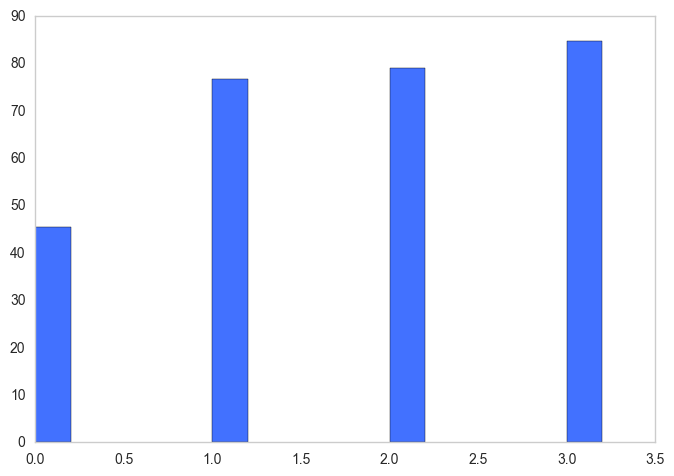

In [143]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.tools as tls

mpl_fig = plt.figure()
y = [(0.476923076923*100), (0.873333333333*100), (0.400683760684*100), (0.893162393162*100)]
#x = ['KNN','Adaboost','GaussianNB','RandomForest']
x = [0,1,2,3]

width = 1/5
plt.bar(x, y, width, color=(0.2588,0.4433,1.0))
#fig = plt.gcf()
#plot_url = py.plot_mpl(fig, filename='surendra_graph1')
plt.show()

In [182]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x = ['KNN','Adaboost','GaussianNB','RandomForest'],
    y = [(0.476923076923*100), (0.873333333333*100), (0.400683760684*100), (0.893162393162*100)],
    marker=dict(
        color=['rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'rgba(204,204,204,1)', 'rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)']),
    width=1/5
)

data = [trace0]
layout = go.Layout(
    title='Different Classifiers for Prediction Model',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='suchet_color')

In [183]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy = clf_random.score(X_test,y_test)
print("In SVM "+str(accuracy))

In SVM 0.893333333333


In [199]:
import re
log =  "10.1.1.18 > 10.1.1.24) ns3"
test = re.search('10.1.1.(.+?) > 10.1.1.(.+?) ns3',log)
if(test is None):
    pass
else:
    print(test.group(1))
    print(test.group(2))

18
24)
